In [61]:
# Libraries
import kaggle
import os
import pandas as pd
import plotly.express as px
import numpy as np

In [65]:
# Additional settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)

In [3]:
# Download Dataset using Kaggle API Key
# Requirements: Kaggle API key
if not os.path.isfile("data/fraudTrain.csv") or not os.path.isfile("data/fraudTest.csv"):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files('kartik2112/fraud-detection', path='./data', unzip=True)

In [4]:
# Dataset Analysis
df_train = pd.read_csv('data/fraudTrain.csv', index_col=0)
df_test = pd.read_csv('data/fraudTest.csv', index_col=0)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [6]:
df_train.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
# Check missing values
# We don't need to impute the data because we don't have missing values
df_train.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
# Unique Val
df_train.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

 Not Fraud (0) 99.42%
 Is Fraud (1) 0.58%



<AxesSubplot:>

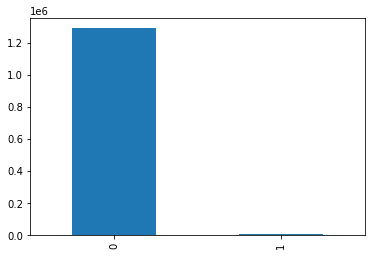

In [31]:
# Target Balance
target_count = df_train['is_fraud'].value_counts()
not_fraud, is_fraud = target_count[0], target_count[1]

print(f" Not Fraud (0) { round(not_fraud * 100 / sum(target_count),2)}%\n Is Fraud (1) {round(is_fraud * 100 / sum(target_count),2)}%\n")

target_count.plot(kind="bar")

In [18]:
# Correlation Matrix
corr = df_train.corr().round(2)
fig = px.imshow(corr)
fig.show()

In [59]:
# Cast Obj -> Datetime
# Train
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'], errors='ignore')
df_train['dob'] = pd.to_datetime(df_train['dob'], errors='ignore')

# Test
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'], errors='ignore')
df_test['dob'] = pd.to_datetime(df_test['dob'], errors='ignore')

<AxesSubplot:>

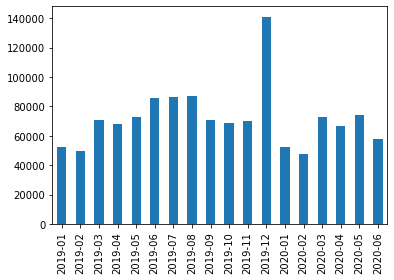

In [45]:
# Datetime
df_train['trans_date_trans_time'].dt.to_period('M').value_counts().sort_index().plot(kind="bar")

<AxesSubplot:>

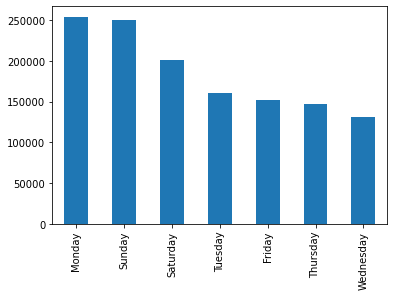

In [33]:
df_train['trans_date_trans_time'].dt.day_name().value_counts().plot(kind="bar")

<AxesSubplot:>

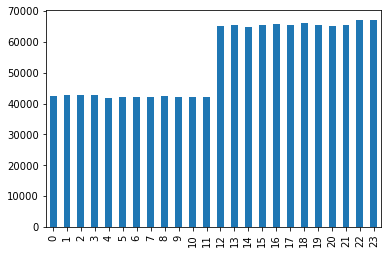

In [43]:
df_train['trans_date_trans_time'].dt.hour.value_counts().sort_index().plot(kind="bar")

<AxesSubplot:>

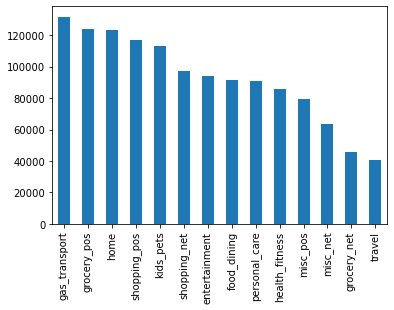

In [46]:
# Category
df_train['category'].value_counts().plot(kind="bar")

<AxesSubplot:>

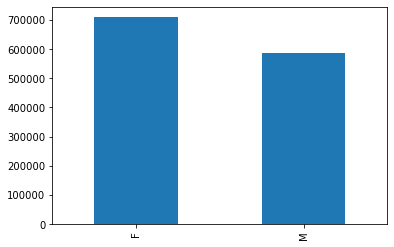

In [47]:
# Gender
df_train['gender'].value_counts().plot(kind="bar")

In [57]:
# Job
df_train['job'].value_counts(normalize=True)

Film/video editor                                              0.007542
Exhibition designer                                            0.007094
Naval architect                                                0.006697
Surveyor, land/geomatics                                       0.006694
Materials engineer                                             0.006378
Designer, ceramics/pottery                                     0.006343
Systems developer                                              0.005938
IT trainer                                                     0.005922
Financial adviser                                              0.005907
Environmental consultant                                       0.005820
Chartered public finance accountant                            0.005560
Scientist, audiological                                        0.005533
Chief Executive Officer                                        0.005531
Copywriter, advertising                                        0

In [58]:
# City
df_train['city'].value_counts(normalize=True)

Birmingham                   0.004332
San Antonio                  0.003956
Utica                        0.003937
Phoenix                      0.003914
Meridian                     0.003902
Thomas                       0.003574
Conway                       0.003558
Cleveland                    0.003551
Warren                       0.003547
Houston                      0.003214
Burbank                      0.003207
Naples                       0.003204
Arcadia                      0.003159
Indianapolis                 0.003141
Brandon                      0.003119
Fulton                       0.003067
Lahoma                       0.002812
Allentown                    0.002806
Lakeland                     0.002803
Dallas                       0.002799
Washington                   0.002786
Andrews                      0.002776
Detroit                      0.002764
Huntsville                   0.002745
Hudson                       0.002735
Orient                       0.002734
Fort Washaki

In [82]:
# Age
age = pd.DataFrame(np.round((df_train['trans_date_trans_time'] - df_train['dob']) / np.timedelta64(1,'Y')), columns=['age'])
age.astype({'age': 'int64'})
age.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,age
count,1.29668e+06
mean,45.9999
std,17.3963
min,14
25%,33
50%,44
75%,57
max,96


<AxesSubplot:>

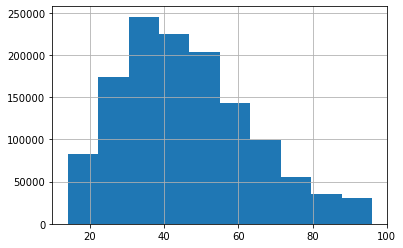

In [83]:
age['age'].hist()

In [ ]:
# TODO: analisis AMT segun si es fraude o no

In [12]:
# Prediction